# NOTEBOOK 4: Regression
## Typical regression algorithms
---
### Linear regression

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_white = pd.read_csv("data/winequality-white.csv", delimiter=";")

X = df_white[['alcohol']] # Reshape to 2D array for single feature
y = df_white['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3281, 1), (1617, 1), (3281,), (1617,))

In [158]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results on test set:")
print(f"MSE: {mse:.7f}")
print(f"R^2 Score: {r2:.3f}")

Linear Regression Results on test set:
MSE: 0.0000029
R^2 Score: 0.645


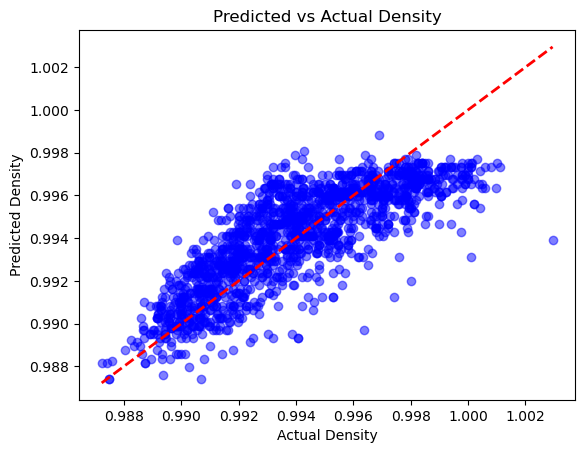

In [160]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Density')
plt.ylabel('Predicted Density')
plt.title('Predicted vs Actual Density')
plt.show()

### Multiple linear regression

In [161]:
X = df_white.drop(['quality', 'density'], axis=1)
y = df_white['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3281, 10), (1617, 10), (3281,), (1617,))

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)
y_pred = mlr_model.predict(X_test_scaled)

In [164]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multiple linear regression results on test set:")
print(f"MSE: {mse:.7f}")
print(f"R^2 Score: {r2:.3f}")

Multiple linear regression results on test set:
MSE: 0.0000002
R^2 Score: 0.972


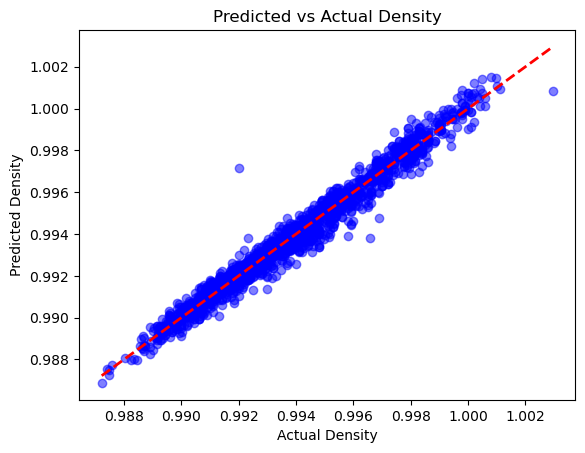

In [165]:
plt.figure()
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Density')
plt.ylabel('Predicted Density')
plt.title('Predicted vs Actual Density')
plt.show()

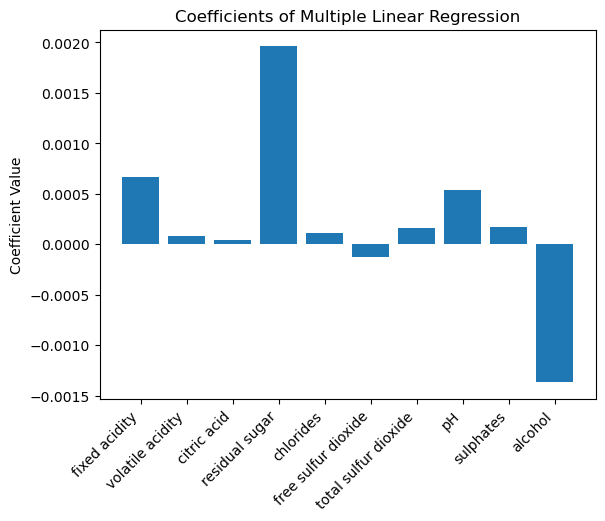

In [166]:
coefficients = mlr_model.coef_
features = X.columns

plt.bar(features, coefficients)
plt.title('Coefficients of Multiple Linear Regression')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

## LASSO
Lasso stands for Least Absolute Shrinkage and Selection Operator. It is a linear regression technique with L1 regularization

**Basic idea**

In ordinary least squares (OLS) regression, we minimize:

$$
\text{Loss} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 
$$

where $y_i$​ is the actual value, and $\hat{y}_i$​ is the predicted value. In LASSO regression, we add a penalty term proportional to the sum of the absolute values of the coefficients:

$$
\text{Loss} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p|\beta_j|
$$

where $\lambda$ is the regularization strength parameter and $\beta_j$ the regression coefficents

The effect of the L1 penalty that it shrinks coefficients towards zero and performs thereby feature selection – some coefficients become exactly zero, effectively excluding unimportant variables from the model

In [167]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)

In [168]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Multiple linear regression results on test set:")
print(f"MSE: {mse:.7f}")
print(f"R^2 Score: {r2:.3f}")

Multiple linear regression results on test set:
MSE: 0.0000003
R^2 Score: 0.968


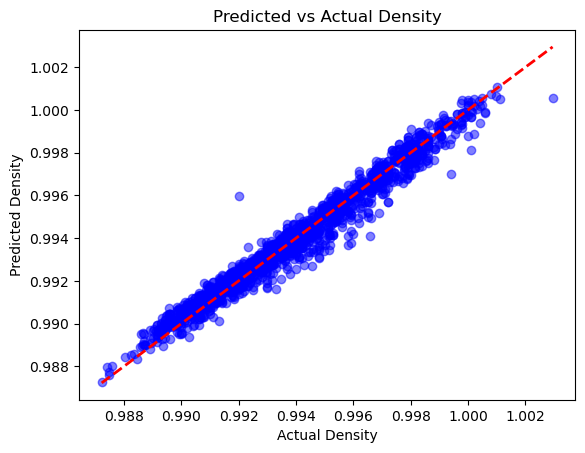

In [169]:
plt.figure()
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Density')
plt.ylabel('Predicted Density')
plt.title('Predicted vs Actual Density')
plt.show()

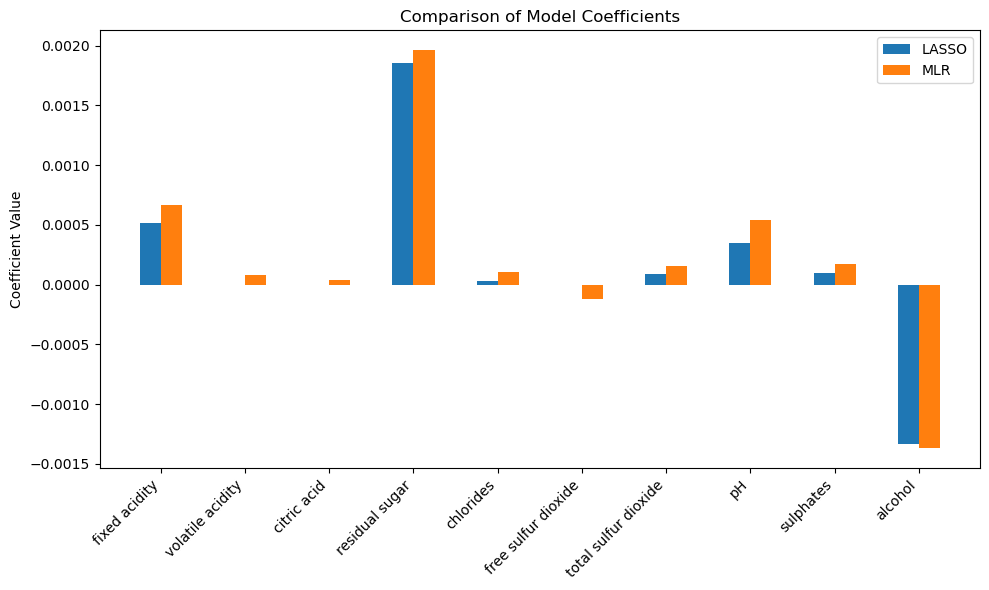

In [170]:
import numpy as np

lasso_coefficients = lasso_model.coef_
mlr_coefficients = mlr_model.coef_
lr_coefficients = lr_model.coef_

bar_width = 0.25
x = np.arange(len(features))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, lasso_coefficients, width=bar_width, label='LASSO')
plt.bar(x + bar_width / 2, mlr_coefficients, width=bar_width, label='MLR')
plt.xticks(x, features, rotation=45, ha='right')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.legend()
plt.tight_layout()
plt.show()